Population Stability Index Test.

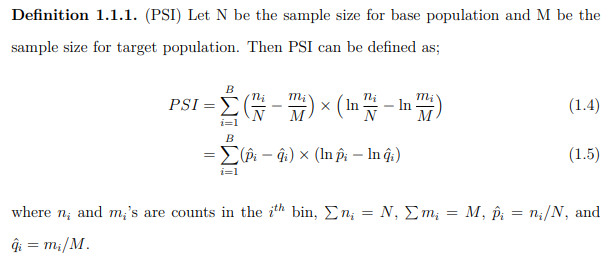

I need to figure out binnning strategies. 
My favourite current strategy is quantile based binning and maybe equal width binning, but there are many such binning strategies.
I think I need a function that inputs two samples of data and a deciding binning parameter and then returns a set of bins that other functions like psi_test can input.
Or ha, the way it works is we combine the the samples, determine the bins, and then use those bins on the original samples.
Seems simple enough for equal width binning, but what about quantile based binning or other binning strategies?
Do we compare reference to target or reference to (reference + target)?
Or for quantile based binning, I have to do it for each particular dataset independently and then compare the results... yeah that makes more sense for quantile.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [1]:
def psi(reference, monitored, bins=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    #TODO: Need to modify this to accept binning methods.
    # If bins is not parametrized, use Doane's formula for calculating number of bins
    if bins is None:
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        bin_edges = np.linspace(min(min(reference), min(monitored)), max(max(reference), max(monitored)), bins + 1)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    return psi

In [27]:
"""
1. create a sample of 1000 elements normally distributed over the range -10, 10.
2. create a numpy.array reference set which takes takes the first 800 elements.
3. create a numpy.array target set which takes the last 200 elements. 
"""

import numpy as np

# 1. Create a sample of 1000 elements normally distributed over the range -10, 10
sample = np.random.normal(loc=0, scale=3.33, size=1000)
sample = np.clip(sample, -10, 10)  # Clip values to ensure they're within -10 to 10

# 2. Create a numpy.array reference set which takes the first 800 elements
reference_set = np.array(sample[:800])

# 3. Create a numpy.array target set which takes the last 200 elements
monitored_set = np.array(sample[-200:])

# Print the shapes to verify
print("Sample shape:", sample.shape)
print("Reference set shape:", reference_set.shape)
print("Monitored set shape:", monitored_set.shape)

Sample shape: (1000,)
Reference set shape: (800,)
Monitored set shape: (200,)


in def plot_histogramm, I can determine the binning strategy using https://numpy.org/doc/stable/reference/generated/numpy.histogram.html, https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

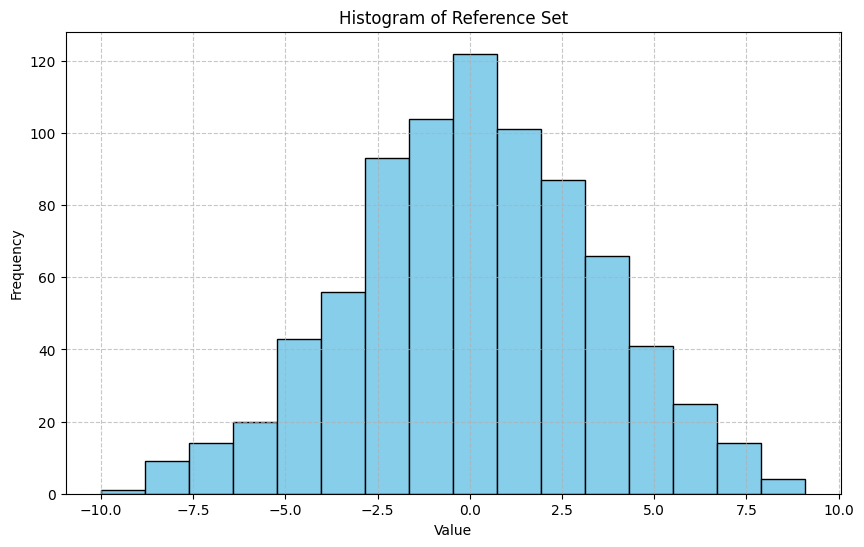

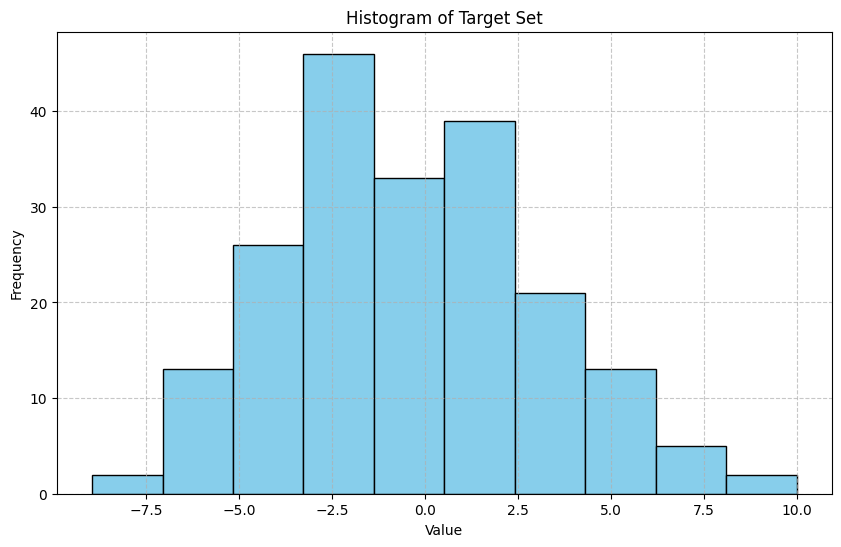

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data_set, title, bins=30, color='skyblue', edgecolor='black'):
    # Use np.histogram to calculate the histogram data
    hist, bin_edges = np.histogram(data_set, bins=bins)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram using bar plot
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), 
            color=color, edgecolor=edgecolor, align='edge')
    
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
plot_histogram(reference_set, "Histogram of Reference Set", "scott")
plot_histogram(target_set, "Histogram of Target Set", "doane")

This does not look right

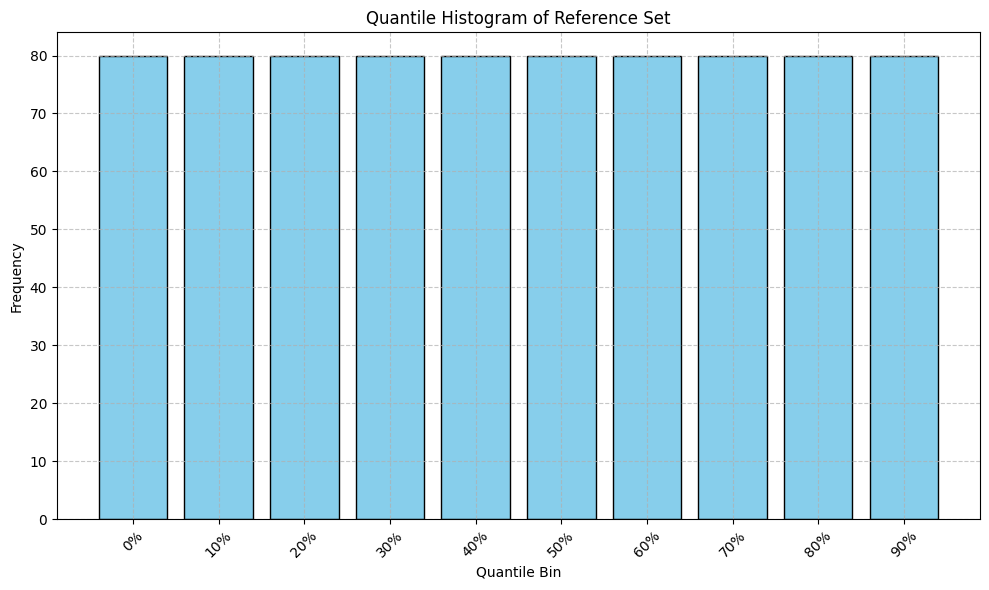

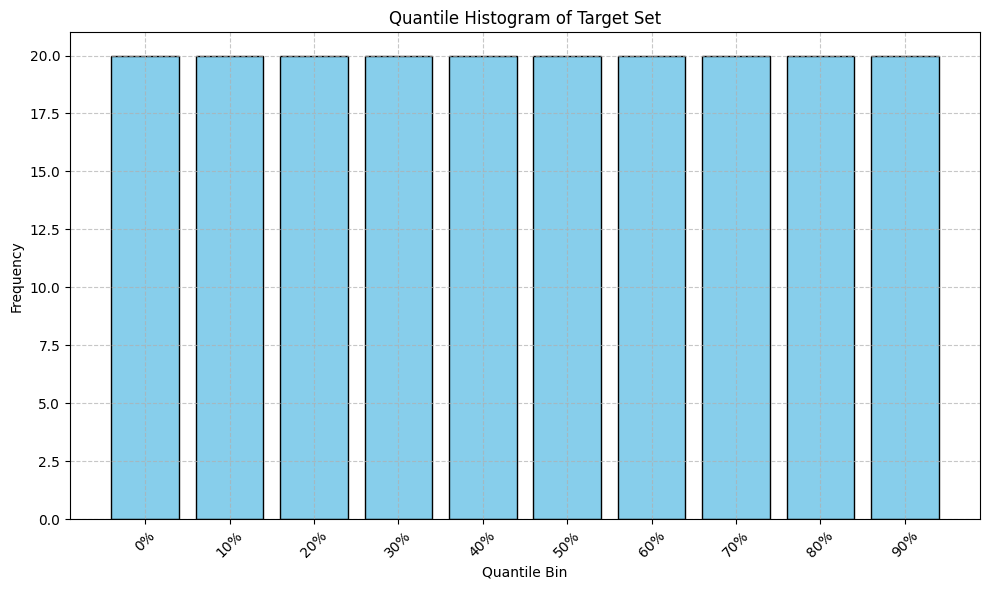

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_quantile_histogram(data_set, title, n_bins=10, color='skyblue', edgecolor='black'):
    # Calculate quantile-based bins
    quantiles = np.linspace(0, 100, n_bins + 1)
    bin_edges = np.percentile(data_set, quantiles)
    
    # Use np.histogram with these bins
    hist, _ = np.histogram(data_set, bins=bin_edges)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram using bar plot
    plt.bar(range(len(hist)), hist, width=0.8, 
            color=color, edgecolor=edgecolor, align='center')
    
    plt.title(title)
    plt.xlabel('Quantile Bin')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks to show quantile ranges
    tick_labels = [f'{q:.0f}%' for q in quantiles[:-1]]
    plt.xticks(range(len(hist)), tick_labels, rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_quantile_histogram(reference_set, "Quantile Histogram of Reference Set")
plot_quantile_histogram(target_set, "Quantile Histogram of Target Set")

In [17]:
def psi(reference, monitored, bins=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    #TODO: Need to modify this to accept binning methods.
    # If bins is not parametrized, use Doane's formula for calculating number of bins
    if bins is None:
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        _, bin_edges = np.histogram(full_dataset, bins=bins)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    return psi

In [15]:
print(psi(reference_set, target_set))

0.08291440683000377


I like this one.

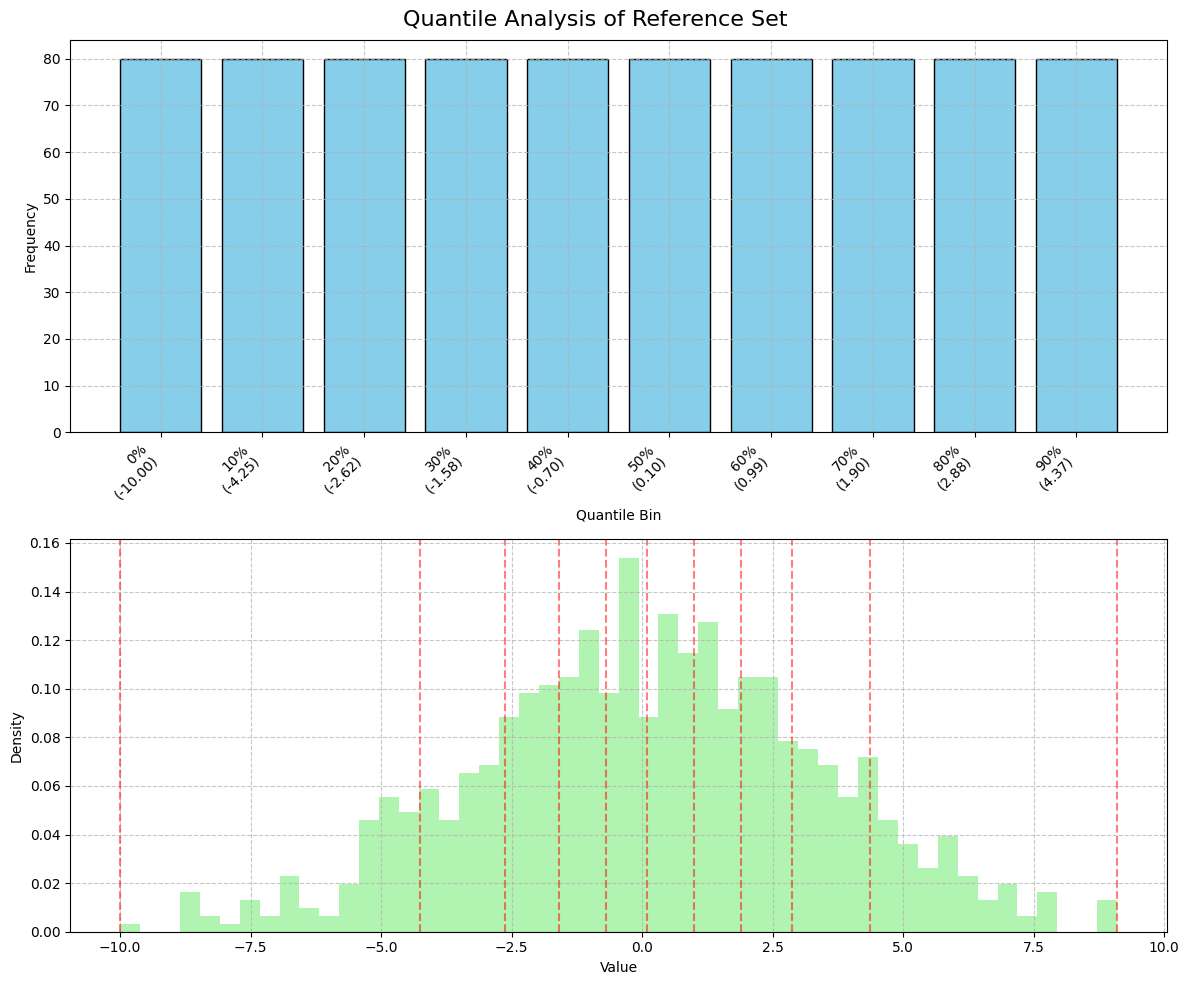

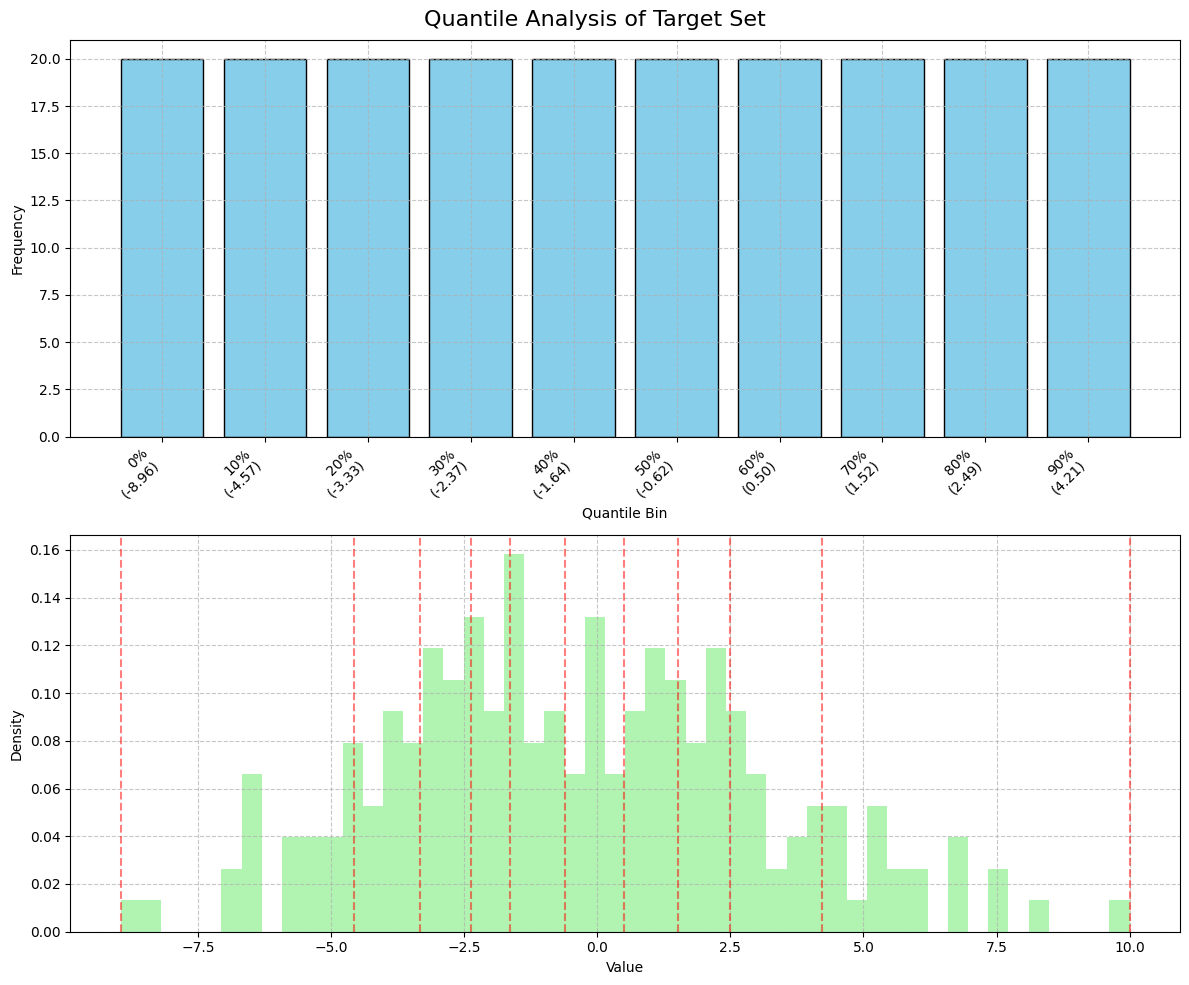

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_quantile_histogram(data_set, title, n_quantiles=10, color='skyblue', edgecolor='black'):
    # Calculate quantile-based bins
    quantiles = np.linspace(0, 100, n_quantiles + 1)
    bin_edges = np.percentile(data_set, quantiles)
    
    # Use np.histogram with these bins
    hist, _ = np.histogram(data_set, bins=bin_edges)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)
    
    # Plot the quantile histogram
    ax1.bar(range(len(hist)), hist, width=0.8, 
            color=color, edgecolor=edgecolor, align='center')
    
    ax1.set_xlabel('Quantile Bin')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks to show quantile ranges with bin edge values
    tick_labels = [f'{q:.0f}%\n({edge:.2f})' for q, edge in zip(quantiles[:-1], bin_edges[:-1])]
    ax1.set_xticks(range(len(hist)))
    ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
    
    # Plot the original distribution with quantile bins
    ax2.hist(data_set, bins=50, density=True, alpha=0.7, color='lightgreen')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Density')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add vertical lines for quantile bins
    for edge in bin_edges:
        ax2.axvline(edge, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_quantile_histogram(reference_set, "Quantile Analysis of Reference Set", n_quantiles=10)
plot_quantile_histogram(target_set, "Quantile Analysis of Target Set", n_quantiles=10)

Bins according to combined reference and monitored

In [19]:
def psi(reference, monitored, bins=None, quantiles=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    quantiles (int, optional): The number of quantiles to use for binning. If set, this will override the 'bins' parameter and use quantile-based binning. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    if quantiles is not None:
        # Use quantile-based binning
        quantile_values = np.linspace(0, 100, quantiles + 1)
        bin_edges = np.percentile(full_dataset, quantile_values)
    elif bins is None:
        # If bins is not parametrized, use Doane's formula for calculating number of bins
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        _, bin_edges = np.histogram(full_dataset, bins=bins)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    return psi

In [36]:
print(psi(reference_set, monitored_set, bins = 10))
print(psi(reference_set, monitored_set, quantiles = 4))

0.09925321224257513
0.020739067827739995


Bins according to referenced

In [37]:
def psi(reference, monitored, bins=None, quantiles=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    quantiles (int, optional): The number of quantiles to use for binning. If set, this will override the 'bins' parameter and use quantile-based binning. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    # full_dataset = np.concatenate((reference, monitored))

    if quantiles is not None:
        # Use quantile-based binning
        quantile_values = np.linspace(0, 100, quantiles + 1)
        bin_edges = np.percentile(reference, quantile_values)
    elif bins is None:
        # If bins is not parametrized, use Doane's formula for calculating number of bins
        _, bin_edges = np.histogram(reference, bins="doane")
    else:  # If number of bins is specified
        _, bin_edges = np.histogram(reference, bins=bins)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    return psi

In [38]:
print(psi(reference_set, monitored_set, bins = 10))
print(psi(reference_set, monitored_set, quantiles = 4))

0.09925321224257513
0.016540444091649245


In [43]:
"""
1. create a sample of 1000 elements normally distributed over the range -10, 10.
2. create a numpy.array reference set which takes takes the first 800 elements.
3. create a numpy.array target set which takes the last 200 elements. 
"""

import numpy as np

# 1. Create a sample of 1000 elements normally distributed over the range -10, 10
sample = np.random.normal(loc=0, scale=3.33, size=1000)
sample = np.clip(sample, -10, 10)  # Clip values to ensure they're within -10 to 10

# 2. Create a numpy.array reference set which takes the first 800 elements
reference_set = np.array(sample[:800])

# 3. Create a numpy.array target set which takes the last 200 elements
monitored_set = np.array(sample[-200:])

# Print the shapes to verify
print("Sample shape:", sample.shape)
print("Reference set shape:", reference_set.shape)
print("Monitored set shape:", monitored_set.shape)

Sample shape: (1000,)
Reference set shape: (800,)
Monitored set shape: (200,)


Combines reference and monitored distribuition to calculate bins.

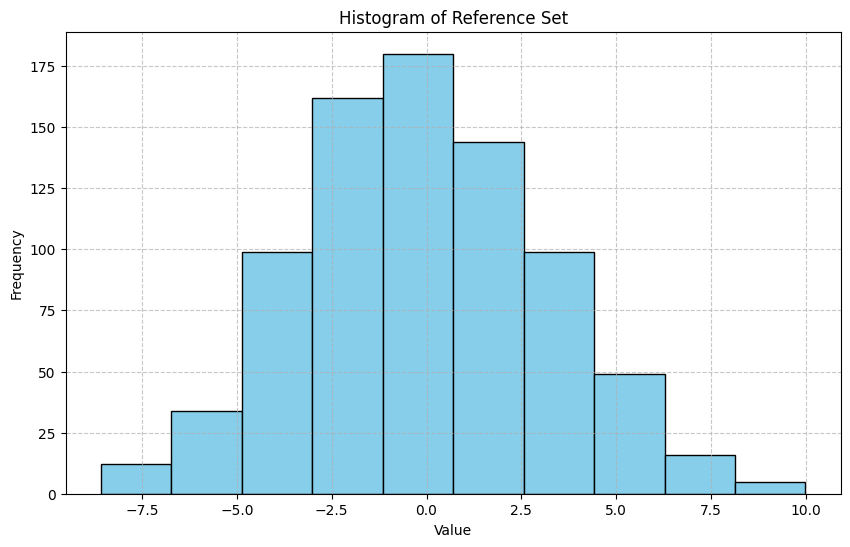

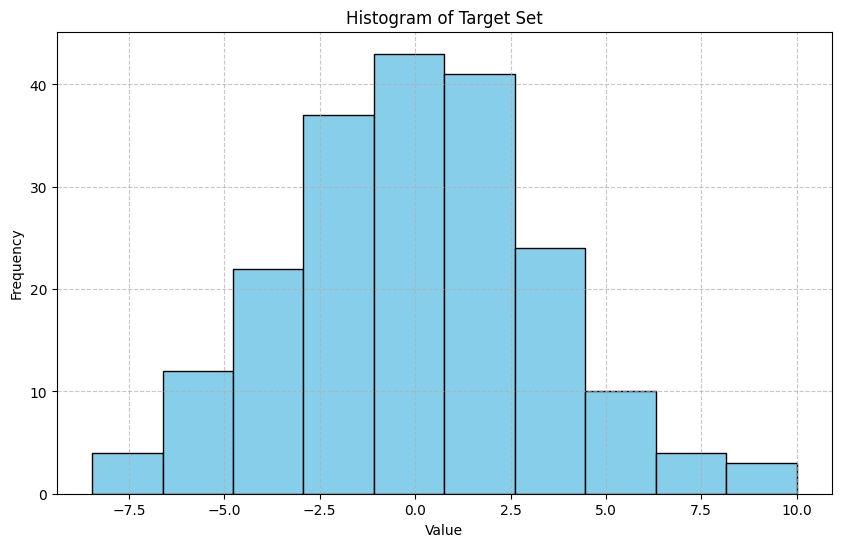

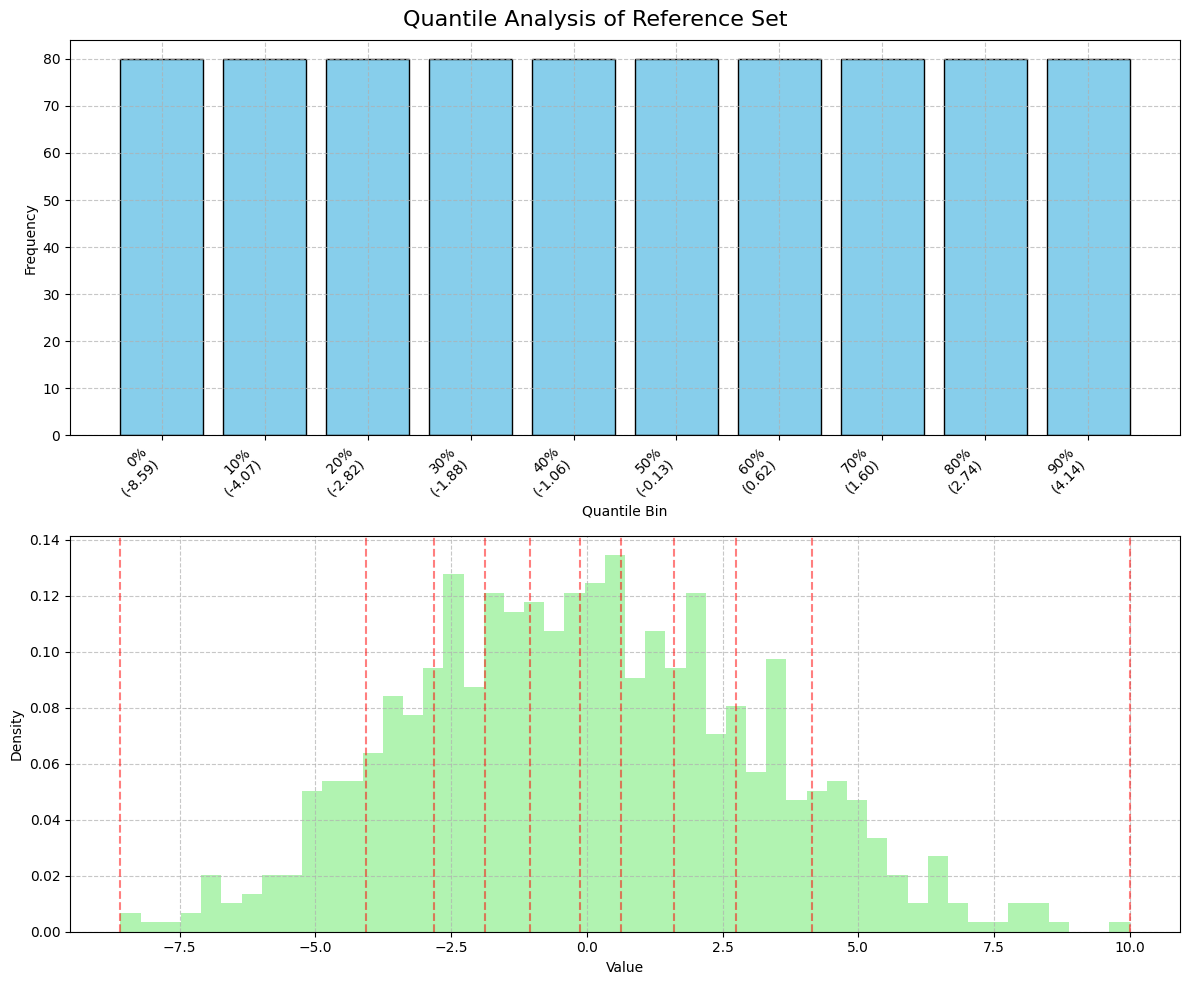

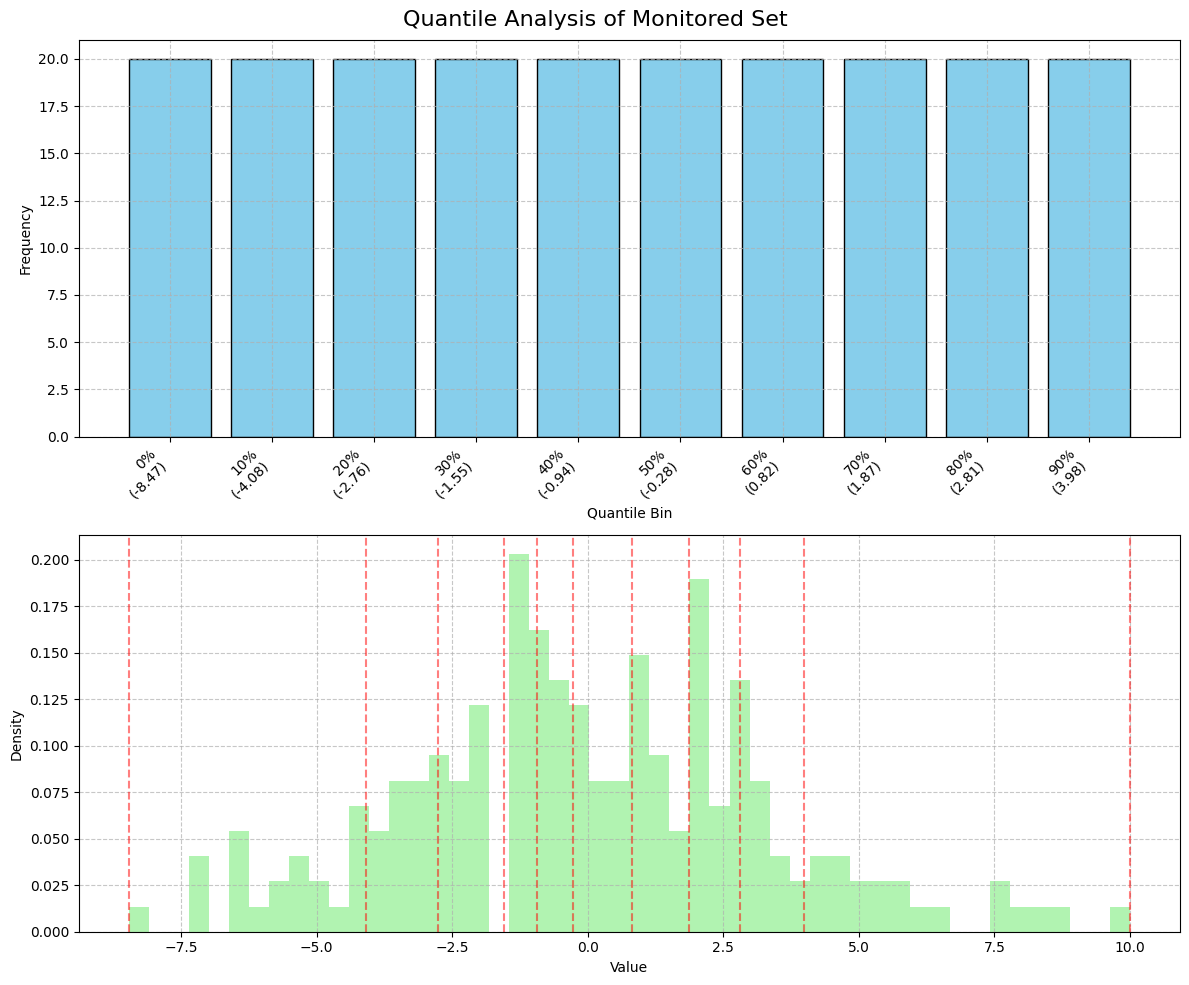

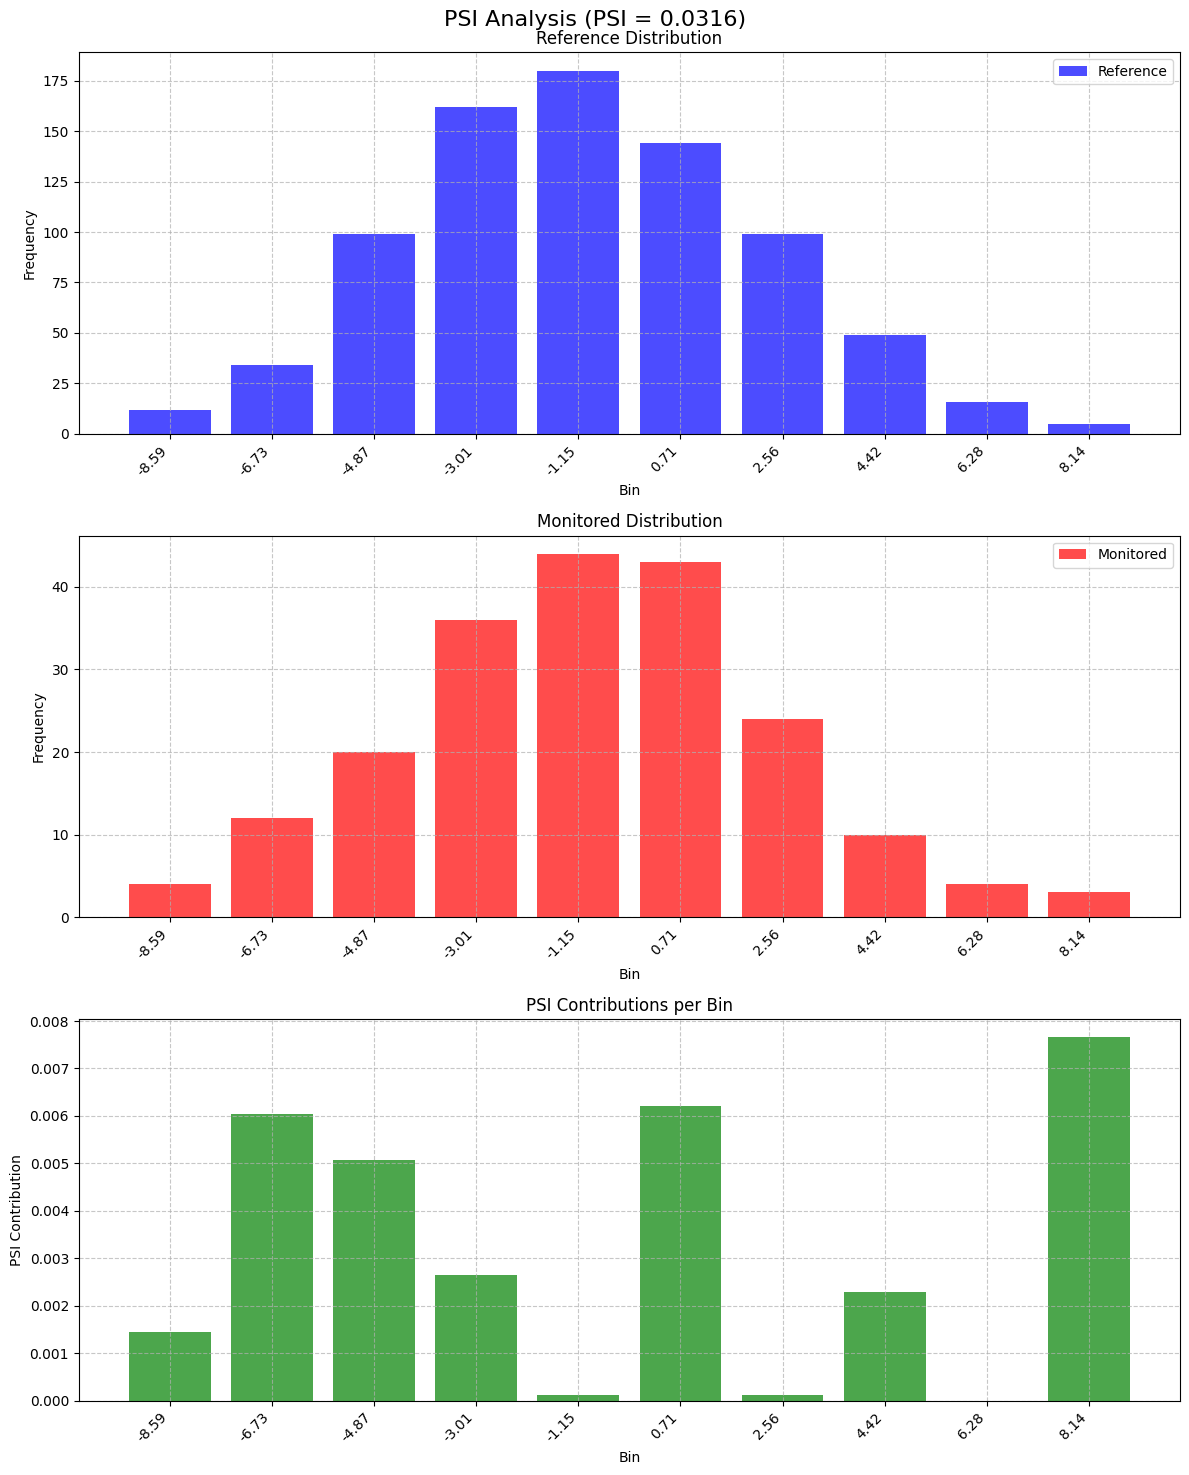

PSI value: 0.03157423619120546


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data_set, title, bins=30, color='skyblue', edgecolor='black'):
    # Use np.histogram to calculate the histogram data
    hist, bin_edges = np.histogram(data_set, bins=bins)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram using bar plot
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), 
            color=color, edgecolor=edgecolor, align='edge')
    
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def plot_quantile_histogram(data_set, title, n_quantiles=10, color='skyblue', edgecolor='black'):
    # Calculate quantile-based bins
    quantiles = np.linspace(0, 100, n_quantiles + 1)
    bin_edges = np.percentile(data_set, quantiles)
    
    # Use np.histogram with these bins
    hist, _ = np.histogram(data_set, bins=bin_edges)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)
    
    # Plot the quantile histogram
    ax1.bar(range(len(hist)), hist, width=0.8, 
            color=color, edgecolor=edgecolor, align='center')
    
    ax1.set_xlabel('Quantile Bin')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks to show quantile ranges with bin edge values
    tick_labels = [f'{q:.0f}%\n({edge:.2f})' for q, edge in zip(quantiles[:-1], bin_edges[:-1])]
    ax1.set_xticks(range(len(hist)))
    ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
    
    # Plot the original distribution with quantile bins
    ax2.hist(data_set, bins=50, density=True, alpha=0.7, color='lightgreen')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Density')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add vertical lines for quantile bins
    for edge in bin_edges:
        ax2.axvline(edge, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def visual_psi(reference, monitored, bins=None, quantiles=None):
    """
    Calculate and visualize the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    quantiles (int, optional): The number of quantiles to use for binning. If set, this will override the 'bins' parameter and use quantile-based binning. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    if quantiles is not None:
        # Use quantile-based binning
        quantile_values = np.linspace(0, 100, quantiles + 1)
        bin_edges = np.percentile(full_dataset, quantile_values)
    elif bins is None:
        # If bins is not parametrized, use Doane's formula for calculating number of bins
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        _, bin_edges = np.histogram(full_dataset, bins=bins)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle(f'PSI Analysis (PSI = {psi:.4f})', fontsize=16)

    # Plot reference histogram
    ax1.bar(range(len(reference_hist)), reference_hist, alpha=0.7, color='blue', label='Reference')
    ax1.set_title('Reference Distribution')
    ax1.set_xlabel('Bin')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Plot monitored histogram
    ax2.bar(range(len(monitored_hist)), monitored_hist, alpha=0.7, color='red', label='Monitored')
    ax2.set_title('Monitored Distribution')
    ax2.set_xlabel('Bin')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    # Plot PSI contributions
    ax3.bar(range(len(psi_values)), psi_values, alpha=0.7, color='green')
    ax3.set_title('PSI Contributions per Bin')
    ax3.set_xlabel('Bin')
    ax3.set_ylabel('PSI Contribution')

    # Set x-ticks to show bin edges
    if quantiles is not None:
        tick_labels = [f'{q:.0f}%\n({edge:.2f})' for q, edge in zip(quantile_values[:-1], bin_edges[:-1])]
    else:
        tick_labels = [f'{edge:.2f}' for edge in bin_edges[:-1]]
    
    for ax in (ax1, ax2, ax3):
        ax.set_xticks(range(len(bin_edges) - 1))
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')
        ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return psi

# Example usage:
# Assuming you have reference_set and target_set defined
plot_histogram(reference_set, "Histogram of Reference Set", 10)
plot_histogram(monitored_set, "Histogram of Target Set", 10)
plot_quantile_histogram(reference_set, "Quantile Analysis of Reference Set", n_quantiles=10)
plot_quantile_histogram(monitored_set, "Quantile Analysis of Monitored Set", n_quantiles=10)
# psi_value = visual_psi(reference_set, monitored_set, quantiles=10)
psi_value = visual_psi(reference_set, monitored_set, bins=10)
print(f"PSI value: {psi_value}")

Just used monitored to create bins.

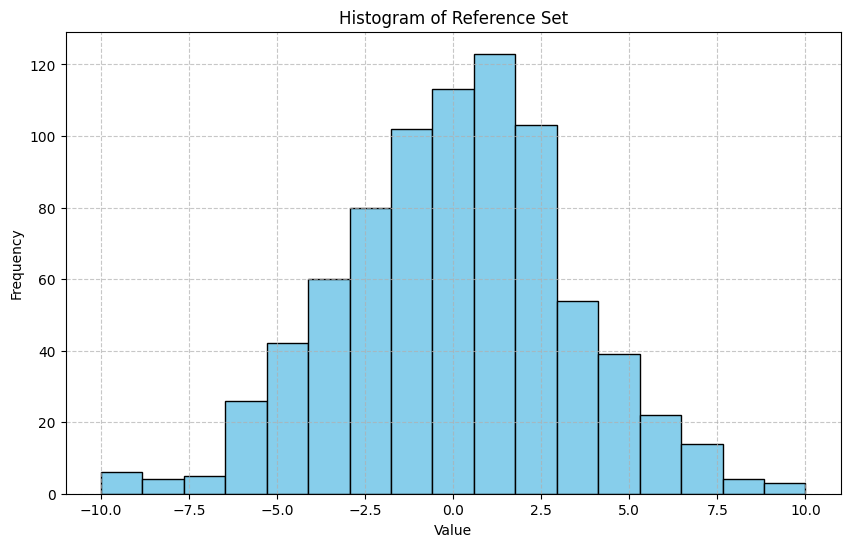

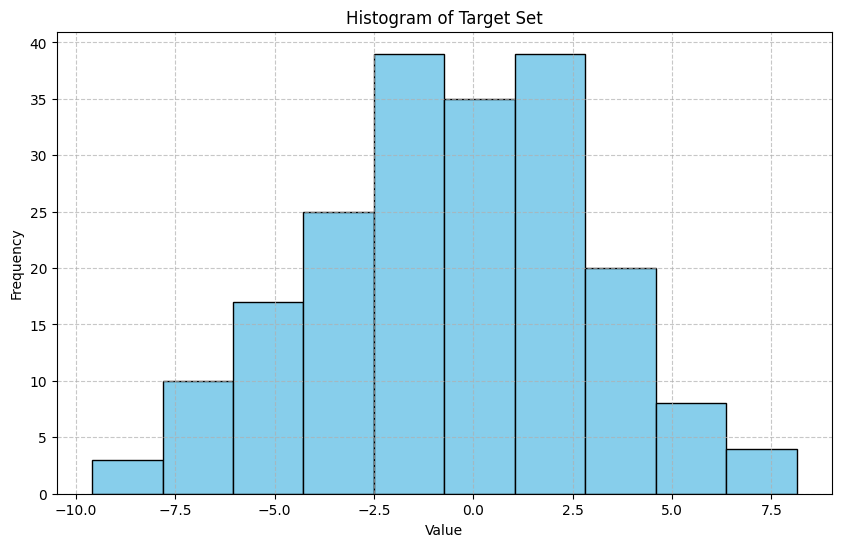

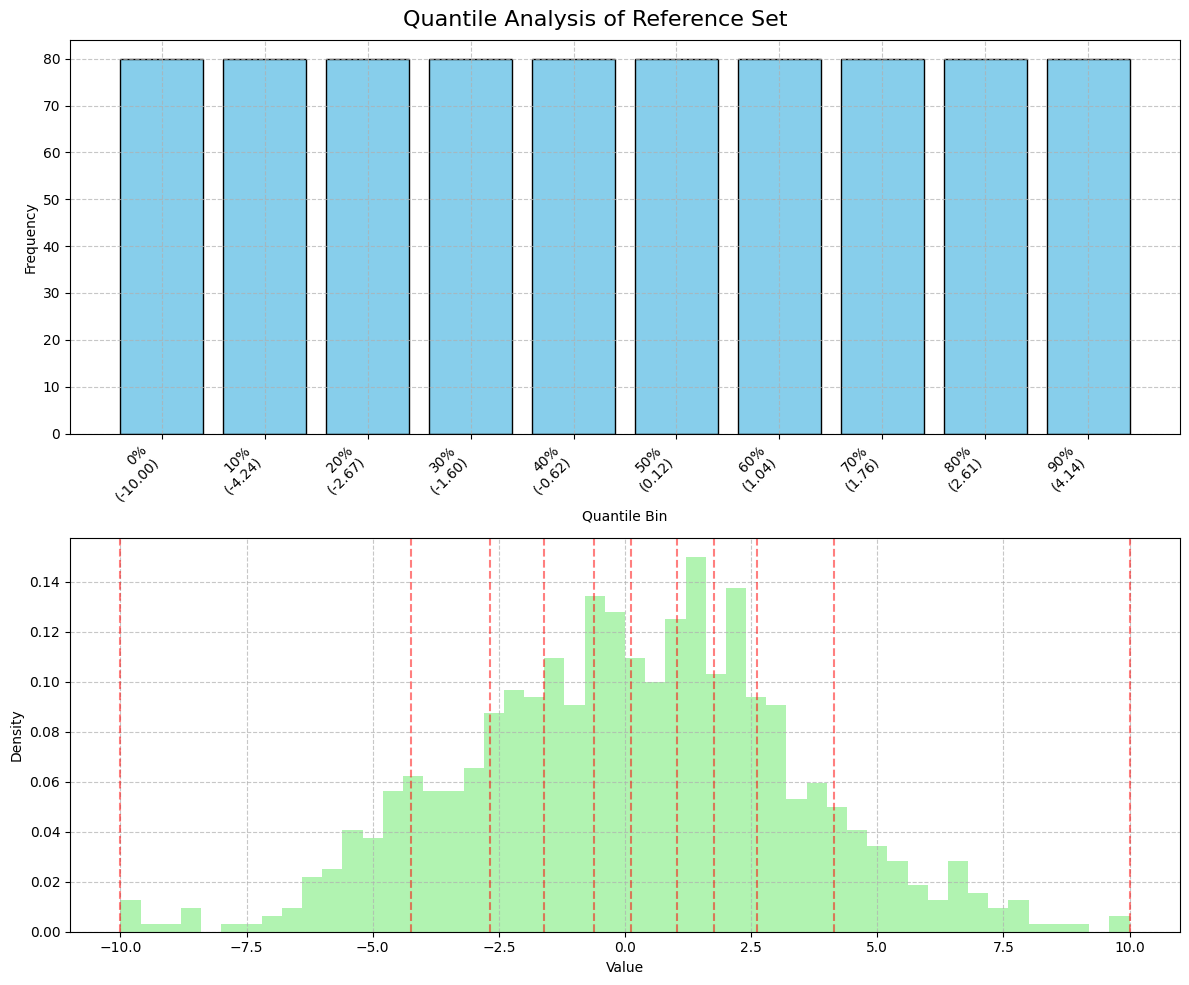

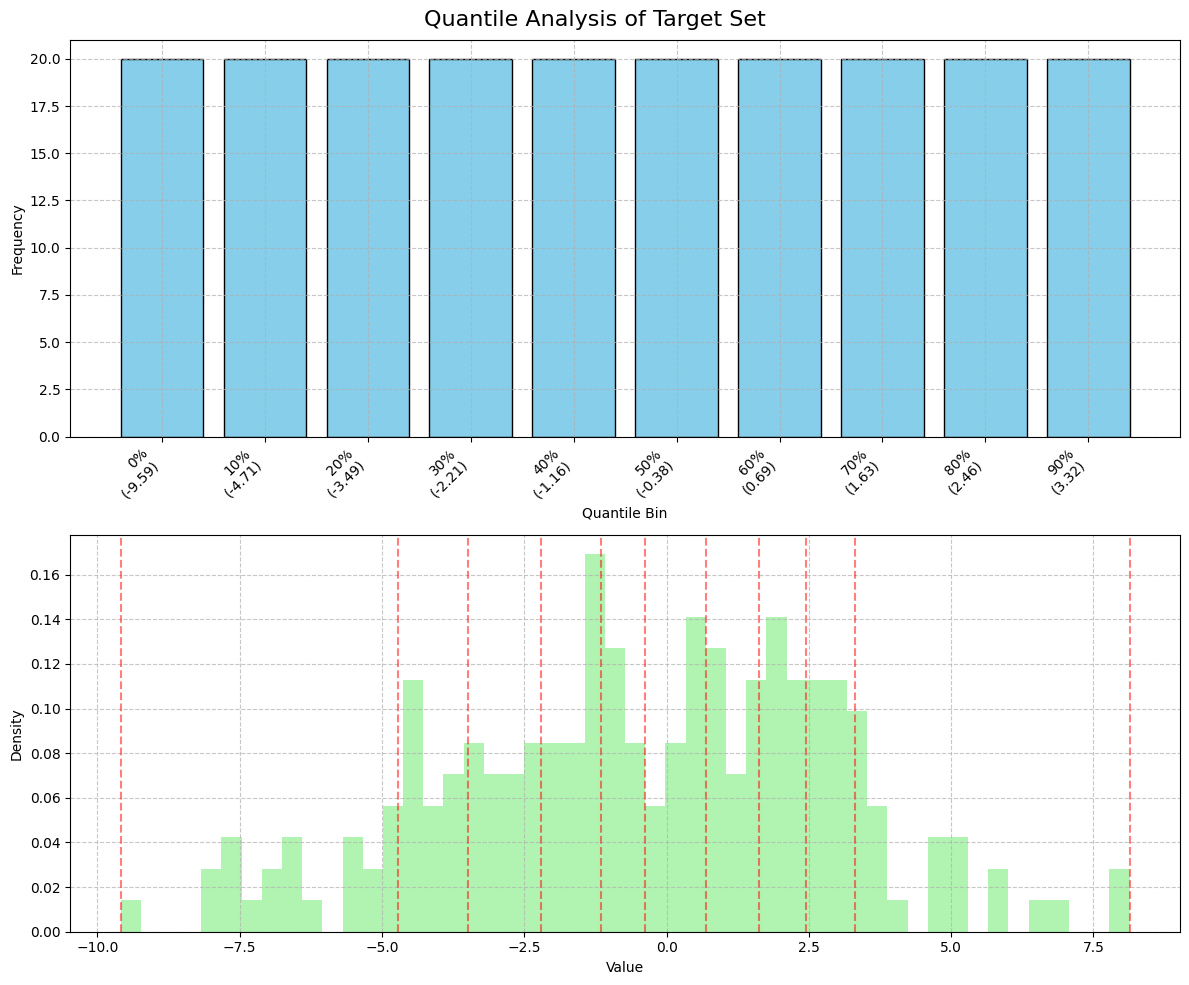

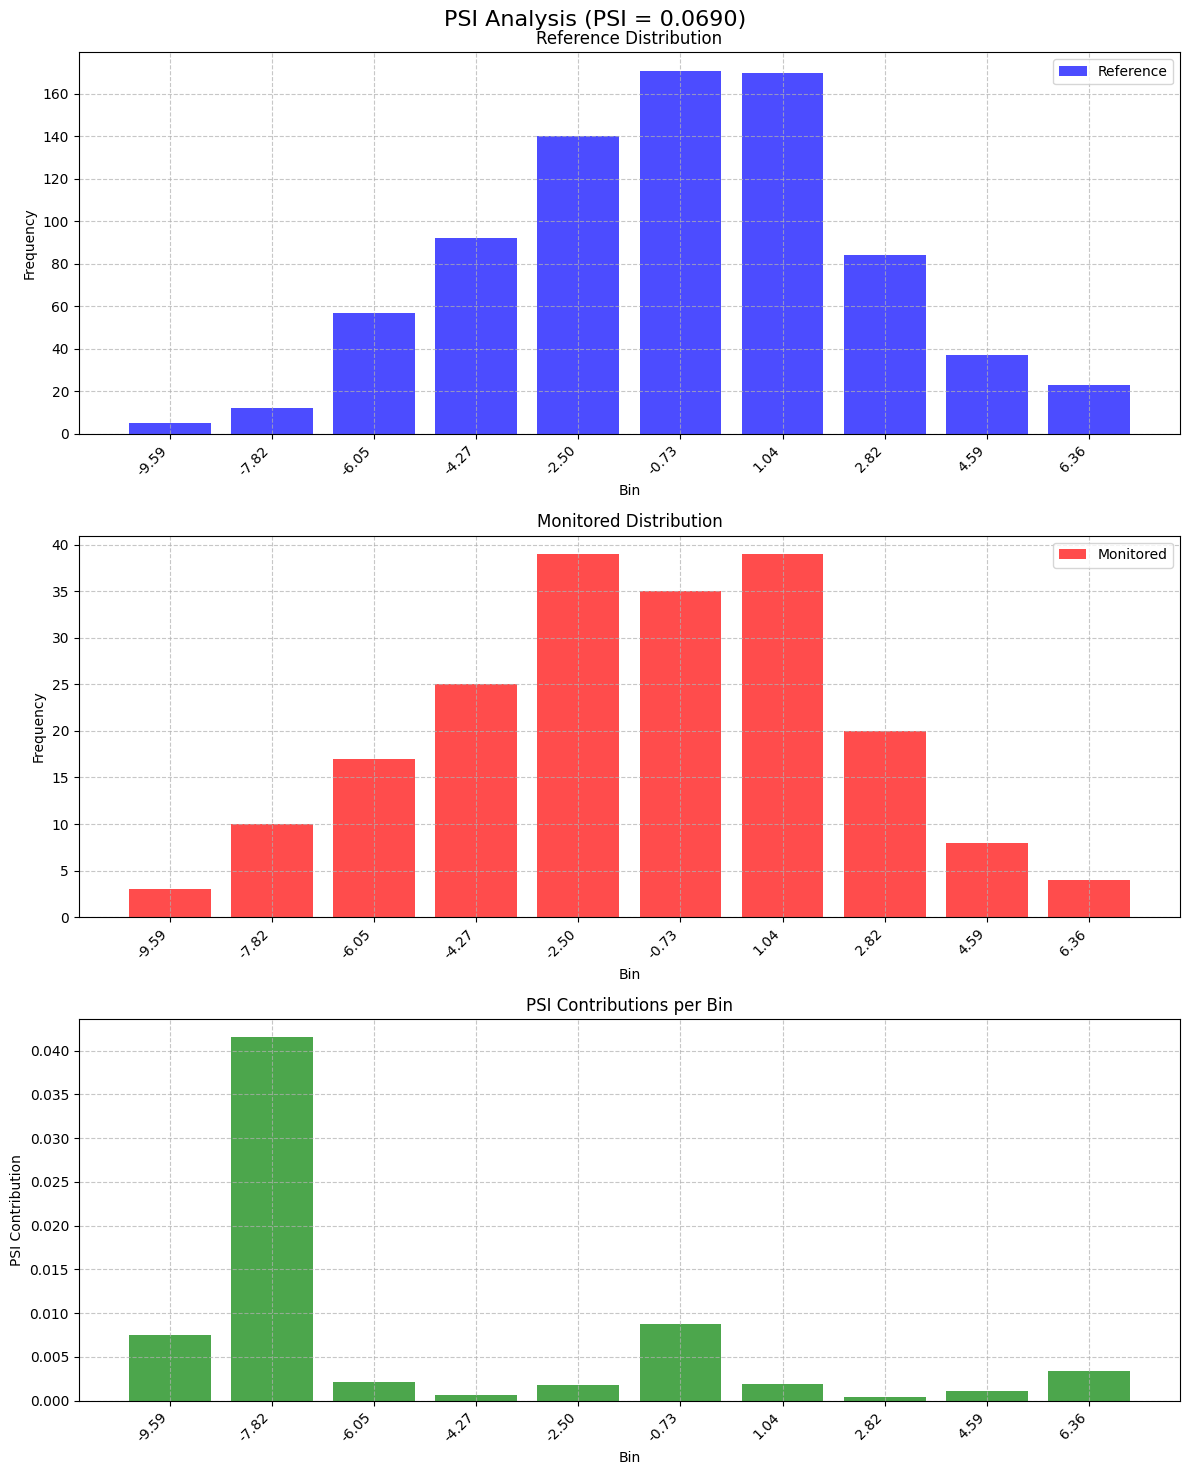

PSI value: 0.0690176315953652


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(data_set, title, bins=30, color='skyblue', edgecolor='black'):
    # Use np.histogram to calculate the histogram data
    hist, bin_edges = np.histogram(data_set, bins=bins)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the histogram using bar plot
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), 
            color=color, edgecolor=edgecolor, align='edge')
    
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def plot_quantile_histogram(data_set, title, n_quantiles=10, color='skyblue', edgecolor='black'):
    # Calculate quantile-based bins
    quantiles = np.linspace(0, 100, n_quantiles + 1)
    bin_edges = np.percentile(data_set, quantiles)
    
    # Use np.histogram with these bins
    hist, _ = np.histogram(data_set, bins=bin_edges)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)
    
    # Plot the quantile histogram
    ax1.bar(range(len(hist)), hist, width=0.8, 
            color=color, edgecolor=edgecolor, align='center')
    
    ax1.set_xlabel('Quantile Bin')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Set x-ticks to show quantile ranges with bin edge values
    tick_labels = [f'{q:.0f}%\n({edge:.2f})' for q, edge in zip(quantiles[:-1], bin_edges[:-1])]
    ax1.set_xticks(range(len(hist)))
    ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
    
    # Plot the original distribution with quantile bins
    ax2.hist(data_set, bins=50, density=True, alpha=0.7, color='lightgreen')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Density')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add vertical lines for quantile bins
    for edge in bin_edges:
        ax2.axvline(edge, color='red', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def visual_psi(reference, monitored, bins=None, quantiles=None):
    """
    Calculate and visualize the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    quantiles (int, optional): The number of quantiles to use for binning. If set, this will override the 'bins' parameter and use quantile-based binning. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    # full_dataset = np.concatenate((reference, monitored))

    if quantiles is not None:
        # Use quantile-based binning
        quantile_values = np.linspace(0, 100, quantiles + 1)
        bin_edges = np.percentile(monitored, quantile_values)
    elif bins is None:
        # If bins is not parametrized, use Doane's formula for calculating number of bins
        _, bin_edges = np.histogram(monitored, bins="doane")
    else:  # If number of bins is specified
        _, bin_edges = np.histogram(monitored, bins=bins)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle(f'PSI Analysis (PSI = {psi:.4f})', fontsize=16)

    # Plot reference histogram
    ax1.bar(range(len(reference_hist)), reference_hist, alpha=0.7, color='blue', label='Reference')
    ax1.set_title('Reference Distribution')
    ax1.set_xlabel('Bin')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Plot monitored histogram
    ax2.bar(range(len(monitored_hist)), monitored_hist, alpha=0.7, color='red', label='Monitored')
    ax2.set_title('Monitored Distribution')
    ax2.set_xlabel('Bin')
    ax2.set_ylabel('Frequency')
    ax2.legend()

    # Plot PSI contributions
    ax3.bar(range(len(psi_values)), psi_values, alpha=0.7, color='green')
    ax3.set_title('PSI Contributions per Bin')
    ax3.set_xlabel('Bin')
    ax3.set_ylabel('PSI Contribution')

    # Set x-ticks to show bin edges
    if quantiles is not None:
        tick_labels = [f'{q:.0f}%\n({edge:.2f})' for q, edge in zip(quantile_values[:-1], bin_edges[:-1])]
    else:
        tick_labels = [f'{edge:.2f}' for edge in bin_edges[:-1]]
    
    for ax in (ax1, ax2, ax3):
        ax.set_xticks(range(len(bin_edges) - 1))
        ax.set_xticklabels(tick_labels, rotation=45, ha='right')
        ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return psi

# Example usage:
# Assuming you have reference_set and target_set defined
plot_histogram(reference_set, "Histogram of Reference Set", "scott")
plot_histogram(monitored_set, "Histogram of Target Set", "doane")
plot_quantile_histogram(reference_set, "Quantile Analysis of Reference Set", n_quantiles=10)
plot_quantile_histogram(monitored_set, "Quantile Analysis of Target Set", n_quantiles=10)
# psi_value = visual_psi(reference_set, monitored_set, quantiles=10)
psi_value = visual_psi(reference_set, monitored_set, bins=10)
print(f"PSI value: {psi_value}")

Graphs are wrong, they are using bin for each individual set not the bins used in the psi computation
Need to productionize by determining psi thresholds,
Need to parameterize which set is used to generate the bins.